# Asset Price Simulation
## Introduction
Financial data has one major limit- it is somewhat scarce. For most assets, practicioners lack observations in order to draw significant conclusions from data. One alternative is to generate fake data. This notebook intends to introduce the main tools - inherited from stochastic processes - that can be used to generate assets prices.

The notebook is organised as follows:

1. Geometric Brownian Motion
2. Correlated Variables

## [1. Geometric Brownian Motion](https://en.wikipedia.org/wiki/Geometric_Brownian_motion)
### Model
A stochastic process $S_t$ follows a geometric brownian motion if it satisfies the followign stochastic differential equation:
$$
dS_t = \mu S_t dt + \sigma S_t dz
$$
Where:

- $\mu$ is the drift
- $\sigma$ is the volatility
- $dz$ is a Wiener Process, $dz \sim N\left(0, \sqrt{dt}\right)$
$$
dS = \left(\mu - \frac{\sigma^2}{2}\right)dt + \sigma dz
$$

Applying Itô's lemma, we obtain:
$$
dG = \left( \mu S\,\frac{\partial{G}}{\partial{S}}+\frac{\partial{G}}{\partial{t}}+\frac{\sigma^2\,S^2}{2}\frac{\partial^2{G}}{\partial{S^2}}\right)\,dt + \sigma S \frac{\partial{G}}{\partial{S}}\,dz
$$

Let $G = \ln S$:
$$
\frac{\partial G}{\partial S} = \frac{1}{S}, \quad \quad \frac{\partial^2 G}{\partial S^2} = -\frac{1}{S^2}, \quad \quad \frac{\partial G}{\partial t} = 0
$$

Therefore:
$$
d\ln S = \left(\mu - \frac{\sigma^2}{2} \right)dt + \sigma\,dz
$$

### Code & Visualisation
Let us develop the corresponding function using `numpy`:


In [143]:
import numpy as np

def asset_gbm(mu = 0.08, sigma = 0.20, dt = 1/252, n = 500, m = 1):
    """
    Generate GBM of asset S.
    Inputs:
        mu, sigma, dt - Processes parameters
        n - Series length
        m - No. of assets to generate
    Output:
        (n, m) array
    """
    dz = np.random.randn(n-1, m) * np.sqrt(dt)
    S = np.zeros((n,m))
    S[1:,:] = (mu - sigma**2 / 2) * dt + sigma * dz
    return np.exp(S.cumsum(axis=0))


Let us now plot the results of our function for m = 5: 

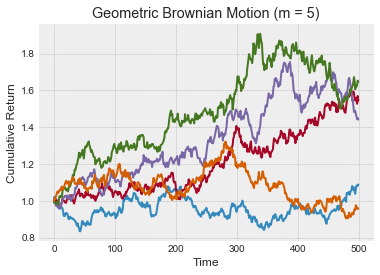

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
fig, ax = plt.subplots()
gbm = asset_gbm(m=5)
plt.style.use('bmh')
ax.plot(gbm, alpha = 1);
ax.set_xlabel('Time');
ax.set_ylabel('Cumulative Return');
ax.set_title('Geometric Brownian Motion (m = 5)');

As we can see, we have generated 5 different paths for the initial asset. Simulations like these may come handy when derivatives pricing (especially options) is involved, as we can generate a large amount of paths for an asset, and from there infer the current price of an option.

### Limits
Even though our assets look realistic at first, they do lack several characteristics of actual financial time series:
- Autocorrelation of squared returns and constant volatility
- Constant mean
- Lack of jumps and leptokurticity

But this is still satisfactory enough for now. In the next section, I show how to simulate correlated assets.


## Correlated Variables
If we have 2 normal and uncorrelated random variables $X_1,X_2$ then we can create a random variable $Y$, with correlation $\rho$ with $X_1$, the following way:
$$
Y = \rho X_1 + \sqrt{1 - \rho^2} X_2
$$

Generalising this to $n$ random variables, we can create a random variable $Y$, correlated to the random variable $X$, using the Cholesky decomposition. Let $C$ be a correlation matrix, using the Cholesky decomposition, we have:
$$
LL^T = C
$$
From there, we can generate $Y$:
$$
LX = Y
$$

In the previous case of two random variables, $L$ is:
$$
L = 
\begin{pmatrix}
1 & 0 \\
\rho & \sqrt{1 - \rho^2}

\end{pmatrix}
$$

## References
- [Geometric Brownian Motion - Wikipedia article](https://en.wikipedia.org/wiki/Geometric_Brownian_motion)
- [Cholesky Decomposition - Wikipedia article](https://en.wikipedia.org/wiki/Cholesky_decomposition)

In [159]:
C = np.random.rand(20,20)